In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.simplefilter("ignore")

In [11]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [12]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [13]:
df.smoking_history.value_counts()


smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [14]:
df.gender.value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [16]:
df = df[df['gender'] != 'Other']

In [7]:
data.gender.value_counts()

gender
Female    58552
Male      41430
Name: count, dtype: int64

In [8]:
data.shape

(99982, 9)

In [9]:
# def categorize_bmi(bmi):
#     if bmi < 18:
#         return 'Underweight'
#     elif 18 <= bmi < 25:
#         return 'Normal weight'
#     else:
#         return 'Overweight'

# data['BMI Category'] = data['bmi'].apply(categorize_bmi)
# data.drop("bmi", axis = 1, inplace=True)
# data['BMI Category'] = label_encoder.fit_transform(data['BMI Category'])

In [26]:
def categorize_glucose(glucose_level):
    if glucose_level < 70:
        return 'Low'
    elif 70 <= glucose_level < 140:
        return 'Normal'
    else:
        return 'High'

df['blood_glucose_level'] = df['blood_glucose_level'].apply(categorize_glucose)

In [27]:
categories_mapping = {'Low': 0, 'Normal': 1, 'High': 2}
df['blood_glucose_level'] = df['blood_glucose_level'].replace(categories_mapping)

In [18]:
df.sample(7)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
54877,Female,6.0,0,0,No Info,18.23,6.5,130,0
80123,Female,11.0,0,0,No Info,19.73,5.7,80,0
61340,Male,43.0,0,0,never,27.32,6.5,160,0
61488,Female,59.0,0,0,not current,27.32,5.7,158,0
7680,Female,65.0,0,0,current,33.00,5.7,158,0
20260,Male,63.0,0,0,former,27.32,3.5,126,0
4296,Male,14.0,0,0,No Info,21.46,6.0,90,0


In [24]:
categories_mapping = {'Female': 0, 'Male': 1}
df['gender'] = df['gender'].replace(categories_mapping)

In [25]:
smoking_mapping = {
    'No Info': 0,
    'never': 1,
    'former': 2,
    'current': 3,
    'not current': 4,
    'ever': 5
}

df['smoking_history'] = df['smoking_history'].map(smoking_mapping)

In [19]:
df = df.drop_duplicates()

In [20]:
df.dropna(inplace=True)

In [21]:
df = df.drop(columns=['HbA1c_level'],axis= 1)

In [11]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


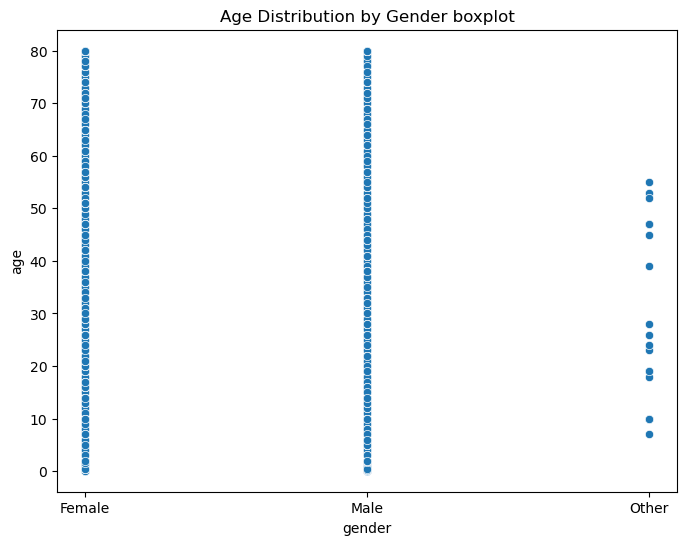

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='gender', y='age', data=df, palette='viridis')
plt.title('Age Distribution by Gender boxplot')
plt.show()

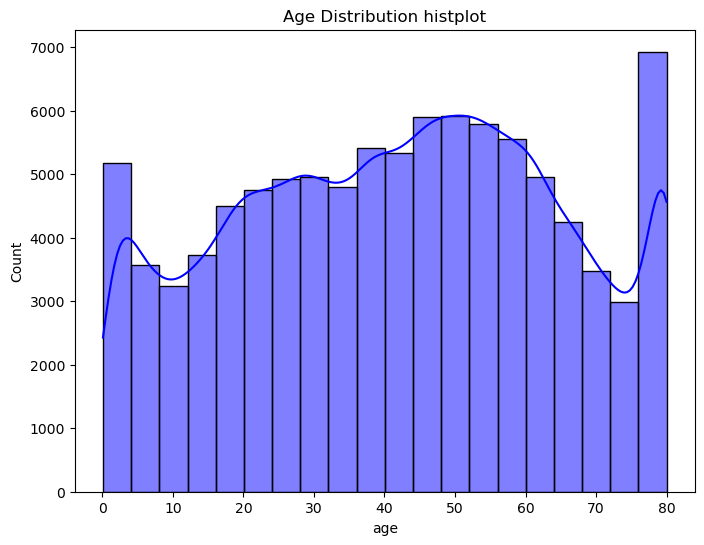

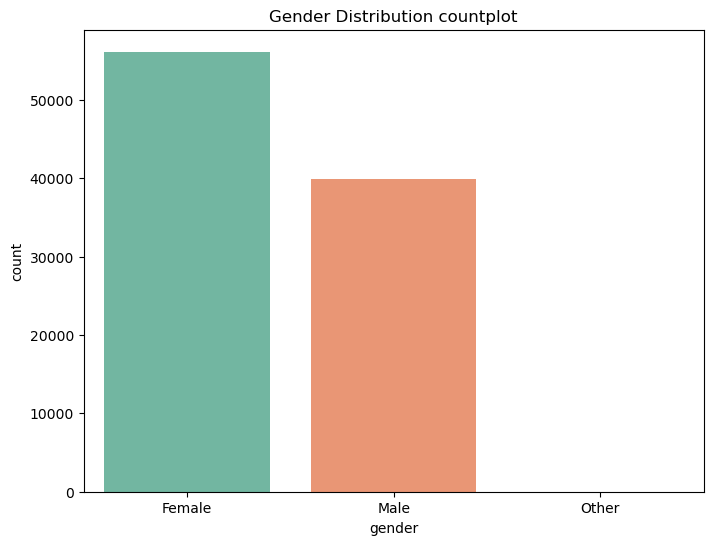

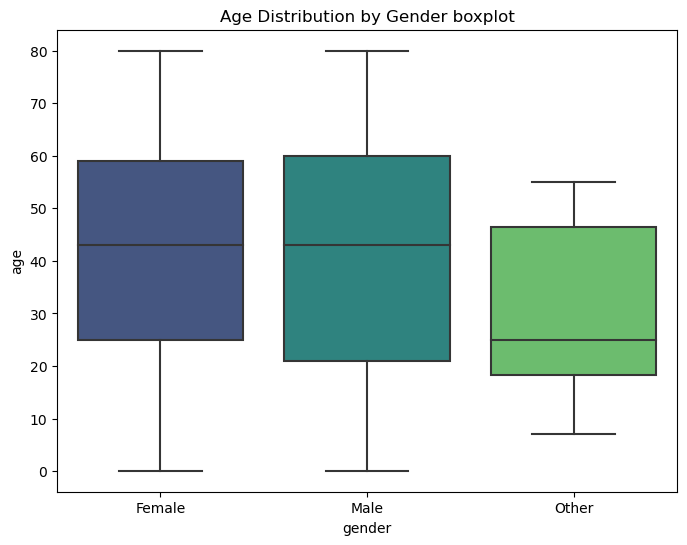

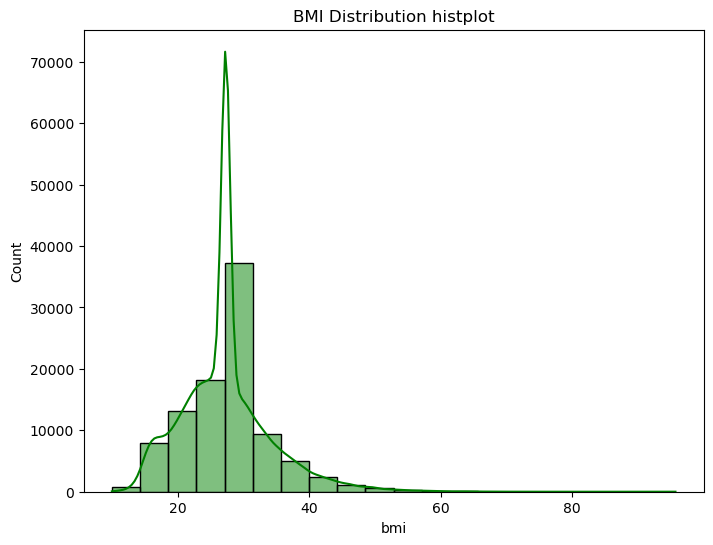

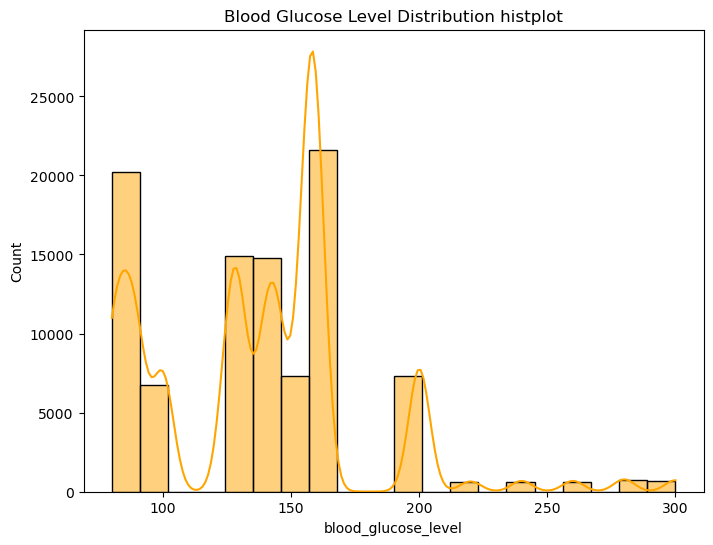

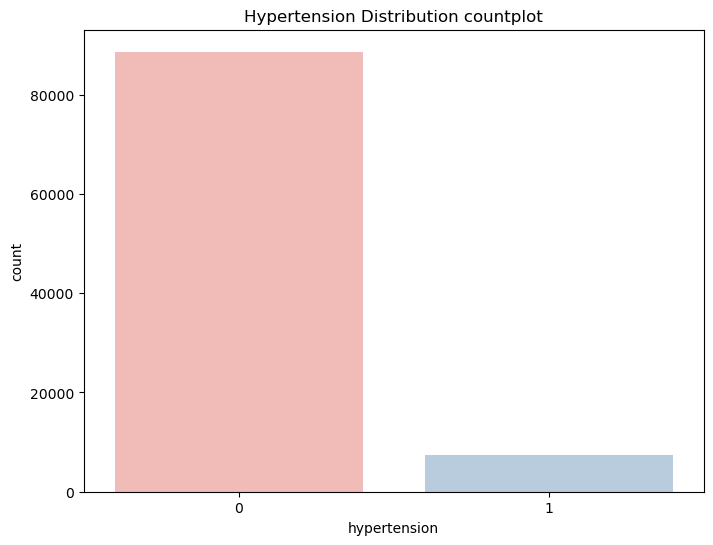

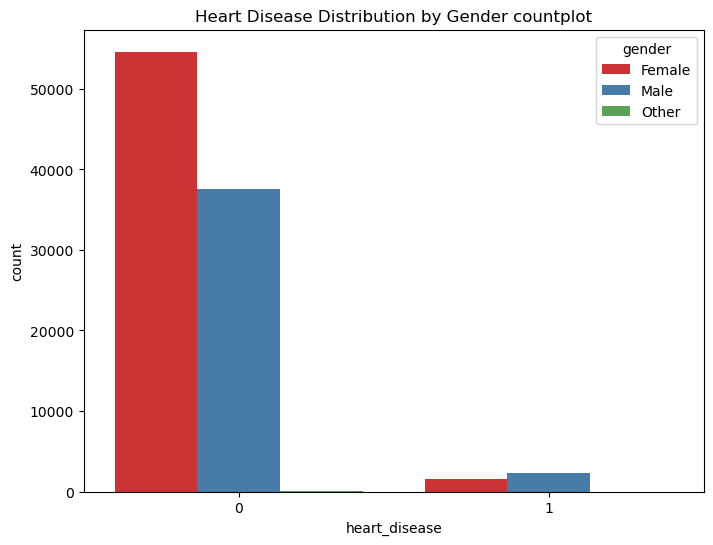

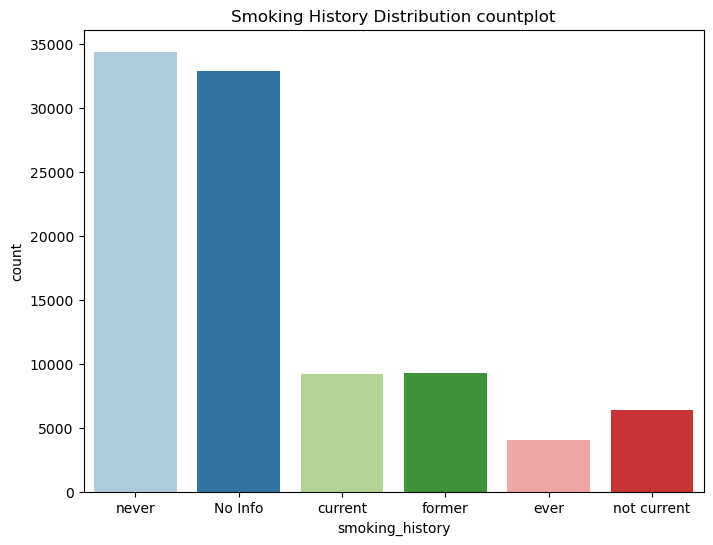

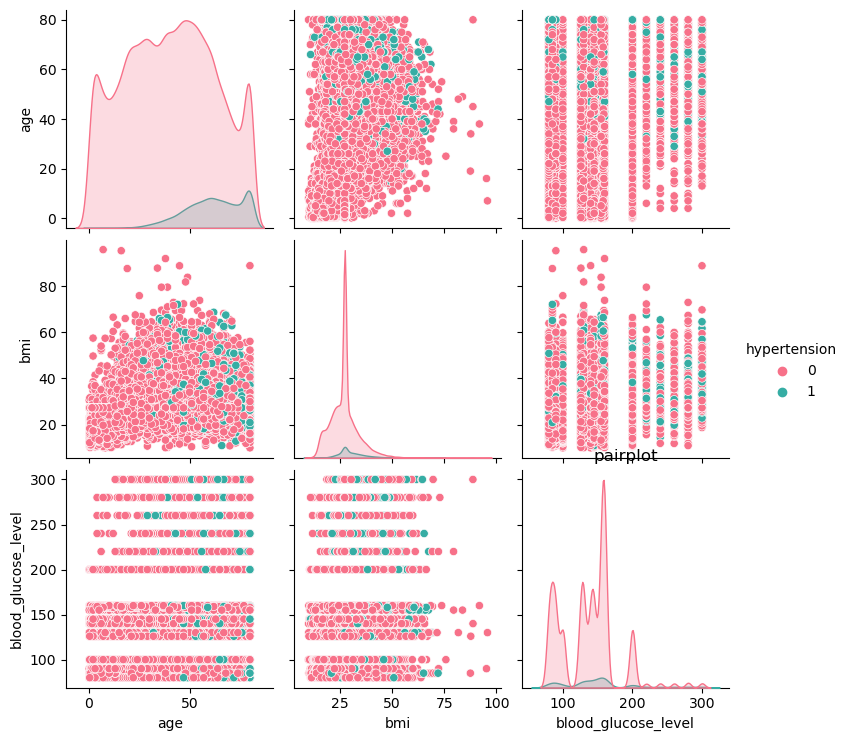

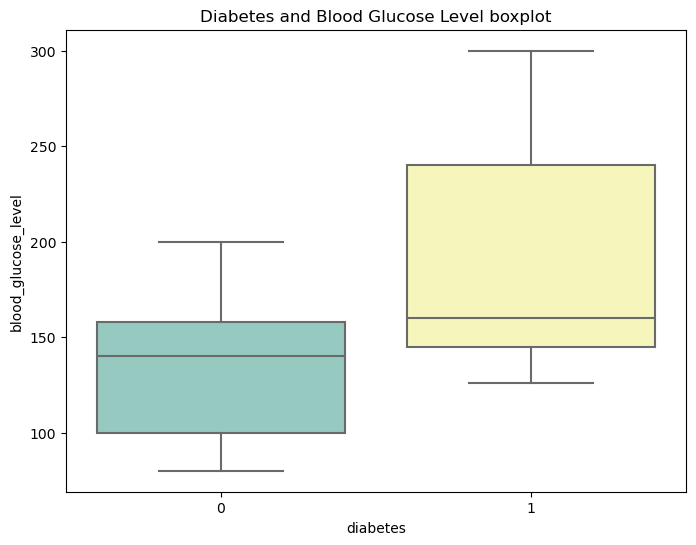

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [28]:
# Step 0: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df.head(1)

# Step 3: Distribution Analysis
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution histplot')
plt.show()

# Step 5: Categorical Data Analysis
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df, palette='Set2')
plt.title('Gender Distribution countplot')
plt.show()

# Step 6: Age Analysis
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='age', data=df, palette='viridis')
plt.title('Age Distribution by Gender boxplot')
plt.show()

# Step 7: BMI Analysis
plt.figure(figsize=(8, 6))
sns.histplot(df['bmi'], bins=20, kde=True, color='green')
plt.title('BMI Distribution histplot')
plt.show()

# Step 8: Blood Glucose Level Analysis
plt.figure(figsize=(8, 6))
sns.histplot(df['blood_glucose_level'], bins=20, kde=True, color='orange')
plt.title('Blood Glucose Level Distribution histplot')
plt.show()

# Step 9: Health Conditions Analysis
plt.figure(figsize=(8, 6))
sns.countplot(x='hypertension', data=df, palette='Pastel1')
plt.title('Hypertension Distribution countplot')
plt.show()

# Step 10: Gender Analysis
plt.figure(figsize=(8, 6))
sns.countplot(x='heart_disease', hue='gender', data=df, palette='Set1')
plt.title('Heart Disease Distribution by Gender countplot')
plt.show()

# Step 11: Smoking History Analysis
plt.figure(figsize=(8, 6))
sns.countplot(x='smoking_history', data=df, palette='Paired')
plt.title('Smoking History Distribution countplot')
plt.show()

# Step 12: Pair Plots (Optional)
sns.pairplot(df[['age', 'bmi', 'blood_glucose_level', 'hypertension']], hue='hypertension', palette='husl')
plt.title('pairplot')
plt.show()

# Step 13: Outlier Detection
plt.figure(figsize=(8, 6))
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df, palette='Set3')
plt.title('Diabetes and Blood Glucose Level boxplot')
plt.show()

# Step 14: Missing Values
missing_values = df.isnull().sum()
print(missing_values)

# Step 15: Statistical Tests (if applicable)
# For example, t-tests or ANOVA for comparing groups statistically.

# Step 16: Conclusion and Insights
# Summarize findings and insights.


In [ ]:
# Step 4: Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

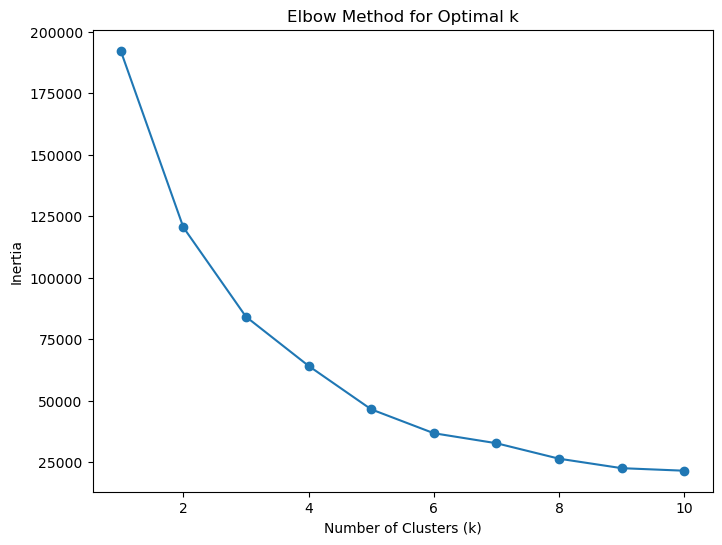

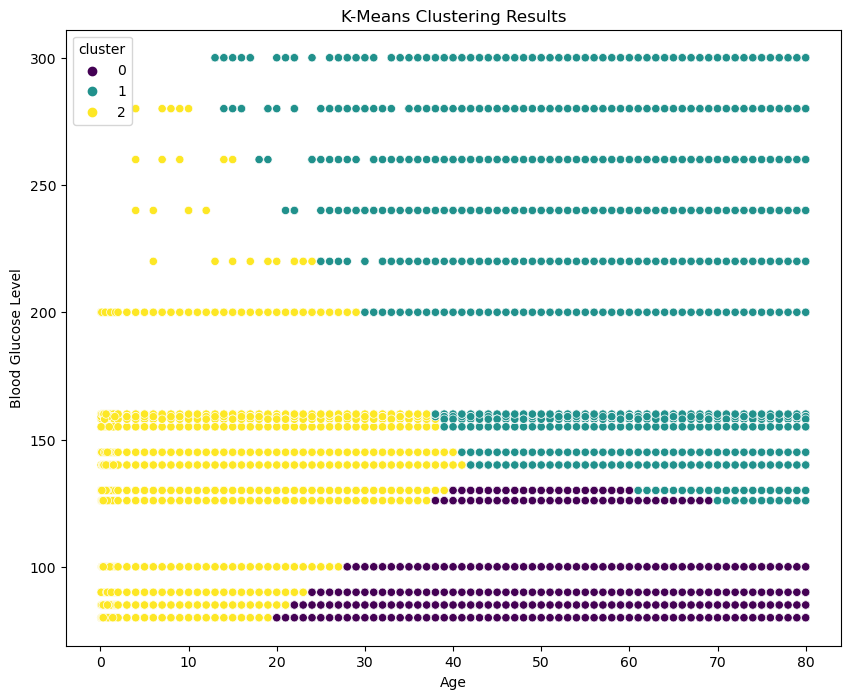

In [29]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df[['age', 'blood_glucose_level']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='age', y='blood_glucose_level', hue='cluster', data=df, palette='viridis')
plt.title('K-Means Clustering Results')
plt.xlabel('Age')
plt.ylabel('Blood Glucose Level')
plt.show()


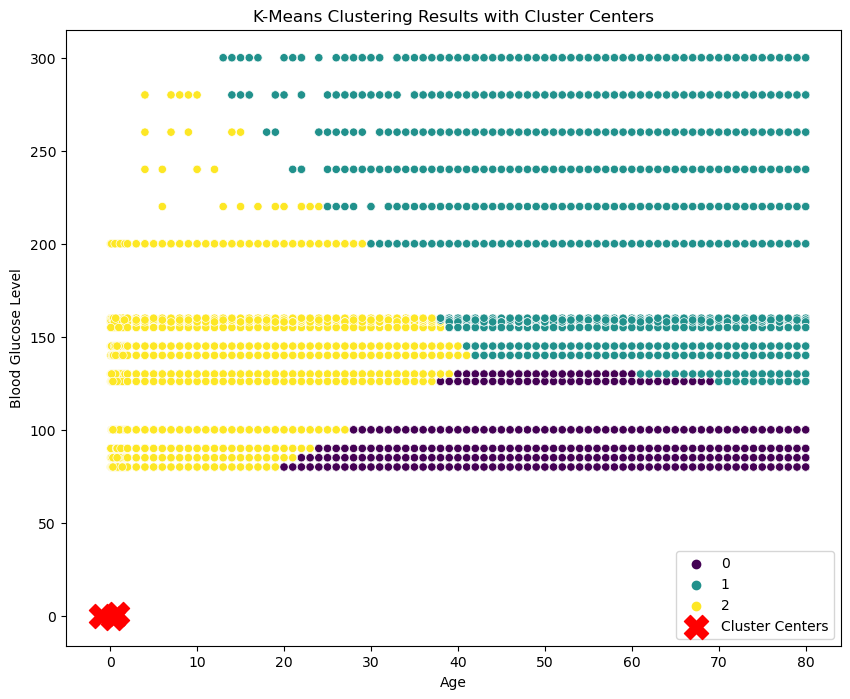

In [32]:
# Visualize the clusters with cluster centers
plt.figure(figsize=(10, 8))
sns.scatterplot(x='age', y='blood_glucose_level', hue='cluster', palette='viridis', data=df, legend='full')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Cluster Centers')
plt.title('K-Means Clustering Results with Cluster Centers')
plt.xlabel('Age')
plt.ylabel('Blood Glucose Level')
plt.legend()
plt.show()


In [28]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,blood_glucose_level,diabetes
0,0,80.0,0,1,1,25.19,2,0
1,0,54.0,0,0,0,27.32,1,0
2,1,28.0,0,0,1,27.32,2,0
3,0,36.0,0,0,3,23.45,2,0
4,1,76.0,1,1,3,20.14,2,0


In [29]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense

# Assuming 'df' is your DataFrame with relevant features and target variable

# Selecting relevant features and target
X = df[['gender','age','heart_disease','smoking_history','bmi','blood_glucose_level']]
y = df['diabetes']  # Assuming 'diabetes' is your target variable

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build a simple neural network model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy}")


Epoch 1/10
2404/2404 [==============================] - 11s 4ms/step - loss: 0.2392 - accuracy: 0.9103 - val_loss: 0.2258 - val_accuracy: 0.9138
Epoch 2/10
2404/2404 [==============================] - 10s 4ms/step - loss: 0.2239 - accuracy: 0.9137 - val_loss: 0.2251 - val_accuracy: 0.9137
Epoch 3/10
2404/2404 [==============================] - 10s 4ms/step - loss: 0.2235 - accuracy: 0.9140 - val_loss: 0.2241 - val_accuracy: 0.9133
Epoch 4/10
2404/2404 [==============================] - 10s 4ms/step - loss: 0.2232 - accuracy: 0.9141 - val_loss: 0.2252 - val_accuracy: 0.9123
Epoch 5/10
2404/2404 [==============================] - 9s 4ms/step - loss: 0.2231 - accuracy: 0.9142 - val_loss: 0.2241 - val_accuracy: 0.9129
Epoch 6/10
2404/2404 [==============================] - 10s 4ms/step - loss: 0.2229 - accuracy: 0.9143 - val_loss: 0.2256 - val_accuracy: 0.9114
Epoch 7/10
2404/2404 [==============================] - 9s 4ms/step - loss: 0.2229 - accuracy: 0.9143 - val_loss: 0.2242 - val_accu

In [33]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

X = df[['gender', 'age', 'heart_disease', 'smoking_history', 'bmi', 'blood_glucose_level']]
y = df['diabetes']  # Assuming 'diabetes' is your target variable

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build an improved neural network model
model = Sequential()
model.add(Dense(units=128, input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(units=64))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Implement early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy}")


Epoch 1/50
1202/1202 [==============================] - 11s 7ms/step - loss: 0.2416 - accuracy: 0.9094 - val_loss: 0.2266 - val_accuracy: 0.9130
Epoch 2/50
1202/1202 [==============================] - 7s 6ms/step - loss: 0.2301 - accuracy: 0.9127 - val_loss: 0.2260 - val_accuracy: 0.9135
Epoch 3/50
1202/1202 [==============================] - 7s 6ms/step - loss: 0.2288 - accuracy: 0.9128 - val_loss: 0.2248 - val_accuracy: 0.9127
Epoch 4/50
1202/1202 [==============================] - 7s 6ms/step - loss: 0.2288 - accuracy: 0.9130 - val_loss: 0.2250 - val_accuracy: 0.9133
Epoch 5/50
1202/1202 [==============================] - 7s 6ms/step - loss: 0.2279 - accuracy: 0.9127 - val_loss: 0.2248 - val_accuracy: 0.9137
Epoch 6/50
1202/1202 [==============================] - 8s 6ms/step - loss: 0.2274 - accuracy: 0.9130 - val_loss: 0.2241 - val_accuracy: 0.9137
Epoch 7/50
1202/1202 [==============================] - 8s 6ms/step - loss: 0.2271 - accuracy: 0.9127 - val_loss: 0.2242 - val_accuracy

In [34]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2

# Assuming 'df' is your DataFrame with relevant features and target variable

# Selecting relevant features and target
X = df[['gender', 'age', 'heart_disease', 'smoking_history', 'bmi', 'blood_glucose_level']]
y = df['diabetes']  # Assuming 'diabetes' is your target variable

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build an improved neural network model with L2 regularization
model = Sequential()
model.add(Dense(units=128, input_dim=X_train.shape[1], kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(units=64, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid', kernel_regularizer=l2(0.01)))

# Compile the model with a different optimizer and a lower learning rate
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Implement early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy}")


Epoch 1/50
1202/1202 [==============================] - 10s 7ms/step - loss: 0.4586 - accuracy: 0.9087 - val_loss: 0.2491 - val_accuracy: 0.9137
Epoch 2/50
1202/1202 [==============================] - 7s 6ms/step - loss: 0.2447 - accuracy: 0.9124 - val_loss: 0.2418 - val_accuracy: 0.9126
Epoch 3/50
1202/1202 [==============================] - 8s 6ms/step - loss: 0.2410 - accuracy: 0.9121 - val_loss: 0.2415 - val_accuracy: 0.9132
Epoch 4/50
1202/1202 [==============================] - 7s 6ms/step - loss: 0.2397 - accuracy: 0.9120 - val_loss: 0.2366 - val_accuracy: 0.9123
Epoch 5/50
1202/1202 [==============================] - 7s 6ms/step - loss: 0.2396 - accuracy: 0.9116 - val_loss: 0.2360 - val_accuracy: 0.9125
Epoch 6/50
1202/1202 [==============================] - 7s 6ms/step - loss: 0.2391 - accuracy: 0.9116 - val_loss: 0.2376 - val_accuracy: 0.9104
Epoch 7/50
1202/1202 [==============================] - 7s 6ms/step - loss: 0.2394 - accuracy: 0.9111 - val_loss: 0.2380 - val_accuracy

In [35]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2

# Assuming 'df' is your DataFrame with relevant features and target variable

# Selecting relevant features and target
X = df[['gender', 'age', 'heart_disease', 'smoking_history', 'bmi', 'blood_glucose_level']]
y = df['diabetes']  # Assuming 'diabetes' is your target variable

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build an improved neural network model with L2 regularization and different optimizer
model = Sequential()
model.add(Dense(units=128, input_dim=X_train.shape[1], kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(units=64, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(units=32, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with a different optimizer and lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Implement early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy}")


Epoch 1/100
1202/1202 [==============================] - 14s 8ms/step - loss: 0.4862 - accuracy: 0.8794 - val_loss: 0.3805 - val_accuracy: 0.9068
Epoch 2/100
1202/1202 [==============================] - 9s 7ms/step - loss: 0.3726 - accuracy: 0.9074 - val_loss: 0.3407 - val_accuracy: 0.9115
Epoch 3/100
1202/1202 [==============================] - 8s 7ms/step - loss: 0.3455 - accuracy: 0.9097 - val_loss: 0.3231 - val_accuracy: 0.9117
Epoch 4/100
1202/1202 [==============================] - 9s 7ms/step - loss: 0.3270 - accuracy: 0.9112 - val_loss: 0.3092 - val_accuracy: 0.9106
Epoch 5/100
1202/1202 [==============================] - 9s 7ms/step - loss: 0.3138 - accuracy: 0.9110 - val_loss: 0.2987 - val_accuracy: 0.9105
Epoch 6/100
1202/1202 [==============================] - 8s 7ms/step - loss: 0.3020 - accuracy: 0.9120 - val_loss: 0.2888 - val_accuracy: 0.9107
Epoch 7/100
1202/1202 [==============================] - 9s 7ms/step - loss: 0.2925 - accuracy: 0.9116 - val_loss: 0.2809 - val_a

1202/1202 [==============================] - 8s 7ms/step - loss: 0.2290 - accuracy: 0.9125 - val_loss: 0.2261 - val_accuracy: 0.9132
Epoch 58/100
1202/1202 [==============================] - 9s 7ms/step - loss: 0.2285 - accuracy: 0.9129 - val_loss: 0.2262 - val_accuracy: 0.9137
Epoch 59/100
1202/1202 [==============================] - 9s 7ms/step - loss: 0.2287 - accuracy: 0.9132 - val_loss: 0.2264 - val_accuracy: 0.9131
Epoch 60/100
1202/1202 [==============================] - 9s 7ms/step - loss: 0.2286 - accuracy: 0.9134 - val_loss: 0.2273 - val_accuracy: 0.9129
Epoch 61/100
1202/1202 [==============================] - 8s 7ms/step - loss: 0.2285 - accuracy: 0.9129 - val_loss: 0.2260 - val_accuracy: 0.9132
Epoch 62/100
1202/1202 [==============================] - 9s 7ms/step - loss: 0.2285 - accuracy: 0.9137 - val_loss: 0.2263 - val_accuracy: 0.9132
Epoch 63/100
1202/1202 [==============================] - 9s 7ms/step - loss: 0.2279 - accuracy: 0.9130 - val_loss: 0.2261 - val_accuracy

In [36]:
# ... (previous code)

# Implement learning rate scheduling
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=10000,
    decay_rate=0.9
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Build an improved neural network model with learning rate scheduling
model = Sequential()
model.add(Dense(units=128, input_dim=X_train.shape[1], kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(units=64, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(units=32, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with learning rate scheduling and different optimizer
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Implement early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy}")


Epoch 1/100
1202/1202 [==============================] - 14s 8ms/step - loss: 0.4949 - accuracy: 0.8725 - val_loss: 0.3871 - val_accuracy: 0.9031
Epoch 2/100
1202/1202 [==============================] - 9s 7ms/step - loss: 0.3747 - accuracy: 0.9069 - val_loss: 0.3456 - val_accuracy: 0.9068
Epoch 3/100
1202/1202 [==============================] - 8s 7ms/step - loss: 0.3477 - accuracy: 0.9092 - val_loss: 0.3281 - val_accuracy: 0.9092
Epoch 4/100
1202/1202 [==============================] - 9s 7ms/step - loss: 0.3319 - accuracy: 0.9107 - val_loss: 0.3151 - val_accuracy: 0.9114
Epoch 5/100
1202/1202 [==============================] - 9s 7ms/step - loss: 0.3189 - accuracy: 0.9113 - val_loss: 0.3044 - val_accuracy: 0.9124
Epoch 6/100
1202/1202 [==============================] - 8s 7ms/step - loss: 0.3099 - accuracy: 0.9110 - val_loss: 0.2955 - val_accuracy: 0.9133
Epoch 7/100
1202/1202 [==============================] - 8s 7ms/step - loss: 0.2996 - accuracy: 0.9115 - val_loss: 0.2887 - val_a

1202/1202 [==============================] - 9s 7ms/step - loss: 0.2305 - accuracy: 0.9132 - val_loss: 0.2283 - val_accuracy: 0.9133
Epoch 58/100
1202/1202 [==============================] - 8s 7ms/step - loss: 0.2303 - accuracy: 0.9136 - val_loss: 0.2279 - val_accuracy: 0.9132
Epoch 59/100
1202/1202 [==============================] - 9s 7ms/step - loss: 0.2297 - accuracy: 0.9133 - val_loss: 0.2277 - val_accuracy: 0.9131
Epoch 60/100
1202/1202 [==============================] - 9s 7ms/step - loss: 0.2300 - accuracy: 0.9130 - val_loss: 0.2281 - val_accuracy: 0.9136
Epoch 61/100
1202/1202 [==============================] - 9s 7ms/step - loss: 0.2302 - accuracy: 0.9135 - val_loss: 0.2277 - val_accuracy: 0.9137
Epoch 62/100
1202/1202 [==============================] - 9s 7ms/step - loss: 0.2295 - accuracy: 0.9131 - val_loss: 0.2275 - val_accuracy: 0.9130
Epoch 63/100
1202/1202 [==============================] - 8s 7ms/step - loss: 0.2294 - accuracy: 0.9136 - val_loss: 0.2277 - val_accuracy